### Remote Access Test with ICON data for limited area model

From Lukas Kluft, DKRZ

https://gitlab.dkrz.de/-/snippets/79

In [1]:
#pip install --upgrade easygems

In [1]:
import os

In [2]:
print("PYTHONPATH:", os.environ.get('PYTHONPATH'))
print("PATH:", os.environ.get('PATH'))

PYTHONPATH: None
PATH: /Users/gett613/opt/miniconda3/envs/hackathon0/bin:/Users/gett613/opt/miniconda3/condabin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin:/opt/X11/bin:/Library/Apple/usr/bin


In [3]:
import cartopy.crs as ccrs
import easygems.healpix as egh
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import intake

ImportError: Error importing numpy: you should not try to import numpy from
        its source directory; please exit the numpy source tree, and relaunch
        your python interpreter from there.

### Load a Time Sample over the network and plot

CPU times: user 3.08 s, sys: 1.12 s, total: 4.2 s
Wall time: 21.1 s


Text(0.5, 1.0, 'ICON Sfc Wind Speed 2024-08-10 12:00')

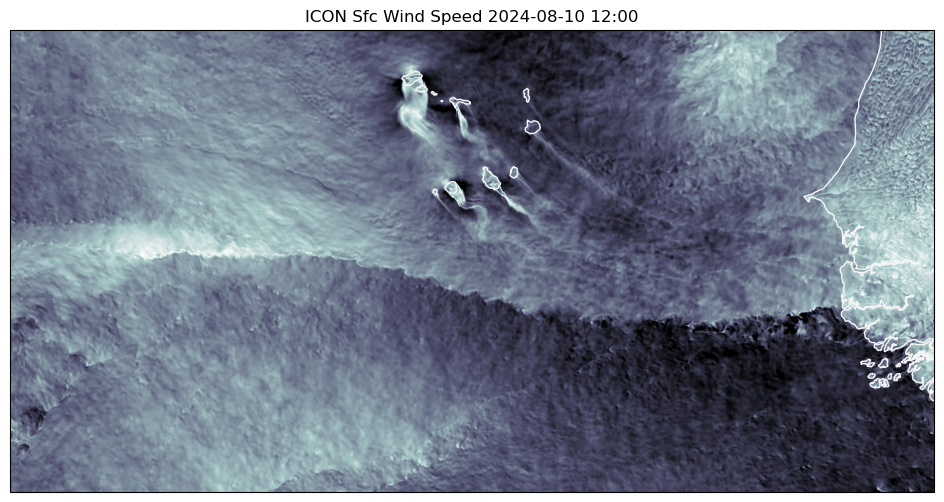

In [3]:
%%time
ds = xr.open_zarr("https://swift.dkrz.de/v1/dkrz_948e7d4bbfbb445fbff5315fc433e36a/lkluft/orcestra_1250m_0809_hpz12.zarr")
ds = ds.assign(sfcwind=lambda dx: np.hypot(dx.uas, dx.vas))
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={"projection": ccrs.PlateCarree()})

tm="2024-08-10 12:00"

ax.coastlines(color="whitesmoke")
ax.set_extent([-33, -15, 9, 18], crs=ccrs.PlateCarree())
ax = egh.healpix_show(ds.sfcwind.sel(time=tm), vmin=0, vmax=12, cmap="bone_r", ax=ax)
#ax = egh.healpix_show(ds.tas.sel(time="2024-08-10 12:00"), cmap="bone_r", ax=ax)
plt.title('ICON Sfc Wind Speed '+tm)

In [8]:
ds

<xarray.Dataset> Size: 659GB
Dimensions:  (cell: 9371648, time: 288)
Coordinates:
  * cell     (cell) int64 75MB 50331648 50331649 ... 201326590 201326591
    crs      float64 8B ...
  * time     (time) datetime64[ns] 2kB 2024-08-09T00:10:00 ... 2024-08-11
Data variables: (12/33)
    cllvi    (time, cell) float32 11GB dask.array<chunksize=(12, 65536), meta=np.ndarray>
    clt      (time, cell) float64 22GB dask.array<chunksize=(12, 65536), meta=np.ndarray>
    evspsbl  (time, cell) float64 22GB dask.array<chunksize=(12, 65536), meta=np.ndarray>
    hfls     (time, cell) float64 22GB dask.array<chunksize=(12, 65536), meta=np.ndarray>
    hfss     (time, cell) float64 22GB dask.array<chunksize=(12, 65536), meta=np.ndarray>
    hus2m    (time, cell) float64 22GB dask.array<chunksize=(12, 65536), meta=np.ndarray>
    ...       ...
    tauu     (time, cell) float64 22GB dask.array<chunksize=(12, 65536), meta=np.ndarray>
    tauv     (time, cell) float64 22GB dask.array<chunksize=(12, 65536), meta=np.ndarray>
    ts       (time, cell) float64 22GB dask.array<chunksize=(12, 65536), meta=np.ndarray>
    uas      (time, cell) float64 22GB dask.array<chunksize=(12, 65536), meta=np.ndarray>
    vas      (time, cell) float64 22GB dask.array<chunksize=(12, 65536), meta=np.ndarray>
    sfcwind  (time, cell) float64 22GB dask.array<chunksize=(12, 65536), meta=np.ndarray>

### Time Average Data

CPU times: user 8.4 s, sys: 3.89 s, total: 12.3 s
Wall time: 32.9 s


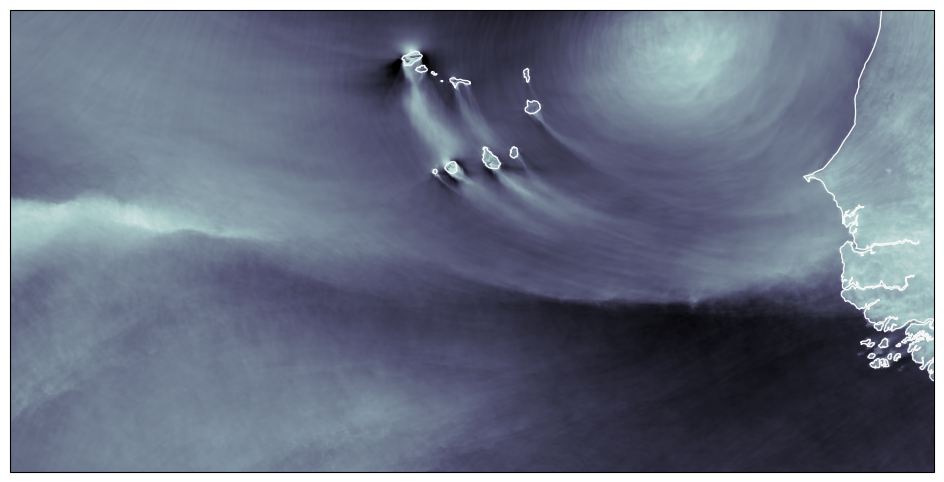

In [6]:
%%time
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={"projection": ccrs.PlateCarree()})

ax.coastlines(color="whitesmoke")
ax.set_extent([-33, -15, 9, 18], crs=ccrs.PlateCarree())
ax = egh.healpix_show(ds.sfcwind.sel(time=slice("2024-08-10 12:00", "2024-08-11 12:00")).mean(dim="time"), vmin=0, vmax=12, cmap="bone_r", ax=ax)

### Test NextGEMS data...

In [8]:
%%time
cat = intake.open_catalog("https://data.nextgems-h2020.eu/online.yaml")
#ds = cat.ICON.ngc4008.to_dask()
ds = cat.ICON.ngc3028.to_dask()

CPU times: user 206 ms, sys: 80.8 ms, total: 286 ms
Wall time: 4.35 s


/Users/gett613/opt/miniconda3/envs/hackathon0/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


In [9]:
ds

<xarray.Dataset> Size: 139MB
Dimensions:                              (time: 1350, depth_half: 129,
                                          cell: 12, level_full: 90, crs: 1,
                                          depth_full: 128,
                                          soil_depth_water_level: 5,
                                          level_half: 91,
                                          soil_depth_energy_level: 5)
Coordinates:
  * crs                                  (crs) float32 4B nan
  * depth_full                           (depth_full) float32 512B 1.0 ... 5....
  * depth_half                           (depth_half) float32 516B 0.0 ... 6....
  * level_full                           (level_full) int32 360B 1 2 3 ... 89 90
  * level_half                           (level_half) int32 364B 1 2 3 ... 90 91
  * soil_depth_energy_level              (soil_depth_energy_level) float32 20B ...
  * soil_depth_water_level               (soil_depth_water_level) float32 20B ...
  * time                                 (time) datetime64[ns] 11kB 2020-01-2...
Dimensions without coordinates: cell
Data variables: (12/88)
    a_tracer_v_to                        (time, depth_half, cell) float32 8MB ...
    atmos_fluxes_frshflux_evaporation    (time, cell) float32 65kB ...
    atmos_fluxes_frshflux_precipitation  (time, cell) float32 65kB ...
    atmos_fluxes_frshflux_runoff         (time, cell) float32 65kB ...
    atmos_fluxes_frshflux_snowfall       (time, cell) float32 65kB ...
    atmos_fluxes_heatflux_latent         (time, cell) float32 65kB ...
    ...                                   ...
    va                                   (time, level_full, cell) float32 6MB ...
    vas                                  (time, cell) float32 65kB ...
    w                                    (time, depth_half, cell) float32 8MB ...
    wa_phy                               (time, level_half, cell) float32 6MB ...
    wind_speed_10m                       (time, cell) float32 65kB ...
    zos                                  (time, cell) float32 65kB ...

In [12]:
pd.DataFrame(cat.ICON.ngc3028.describe()["user_parameters"])

,name,description,type,allowed,default
0,time,time resolution of the dataset,str,"[PT30M, PT3H, P1D]",P1D
1,zoom,zoom resolution of the dataset,int,"[7, 6, 5, 4, 3, 2, 1, 0]",0


CPU times: user 1.61 s, sys: 247 ms, total: 1.86 s
Wall time: 4.9 s


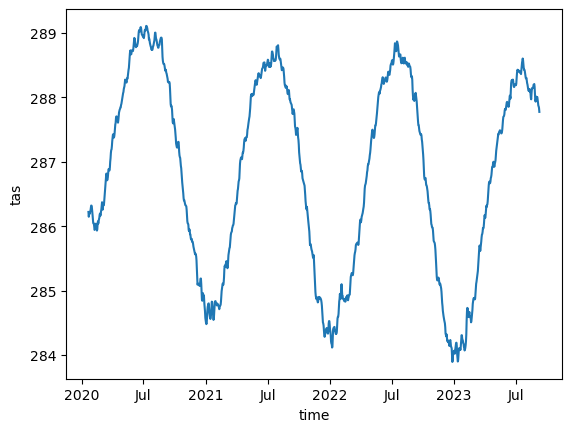

In [13]:
%%time
ds.tas.mean("cell").plot()

/Users/gett613/opt/miniconda3/envs/hackathon0/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


CPU times: user 1.66 s, sys: 197 ms, total: 1.85 s
Wall time: 5.64 s


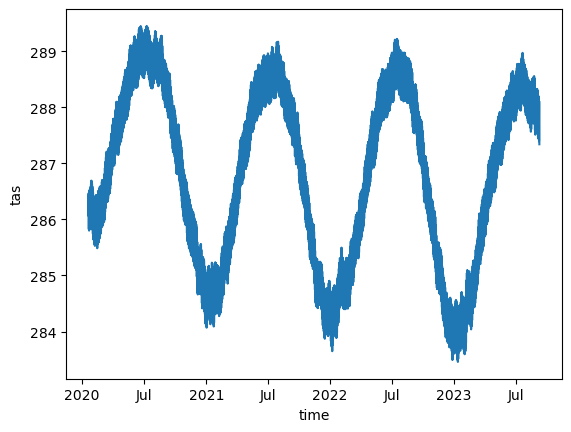

In [14]:
%%time
ds_fine = cat.ICON.ngc3028(
    time="PT30M"
).to_dask()  # this does NOT use dask, see note below
ds_fine.tas.mean("cell").plot()